<h1>Custom Functions<h1>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os

In [2]:
def PathToFile(file, path):
    df = pd.DataFrame(columns = ["x", "y"], data = path)
    df.to_csv(file, index=False)

In [3]:
def Line2(start, end, line):
    d = dist(start, end)
    step = 0.25
    r = int(d/step)
    
    for i in range(r+1):
        x = start[0] + (end[0]-start[0])*i/r
        y = start[1] + (end[1]-start[1])*i/r
        line.append([round(x,1),round(y,1)])

            
    PathToFile("Output.csv", line)

In [4]:
def Line3(start, end, line):
    
    line.append(start)
    line.append(end)
    print(line)
            
    PathToFile("Output.csv", line)

In [5]:
def dist(start, end):
    dist=pow(pow(start[0]-end[0],2)+pow(start[1]-end[1],2),0.5)
    return dist

In [6]:
def LinearPath(l):
    line = []
    for i in range (0, len(l)-1):
        Line2(l[i], l[i+1], line)
    PathToFile("Output.csv", line)
    print(line)

In [7]:
def Circle(r, line): 
    theta = np.linspace( 0 , 2 * np.pi , 360 )
    radius = r
    a = radius * np.cos( theta )
    b = radius * np.sin( theta )
    for i in range(0,len(a)):
        line.append([round(a[i],3),round(b[i],3)])
        plt.scatter(round(a[i],3),round(b[i],3))
    PathToFile("Output.csv", line)
    print(line)

In [8]:
def StartPoint(corners):
    x_min = 100000
    y_min = 100000
    y_max = 0
    x_max = 0
    count = 0
    for corner in corners:
        x,y= corner[0]
        x= int((x))
        y= int((y))
    
    #START POINT LOCATER
    
        if(x<x_min):
            x_min = x
            y_min = y
            
        if(y>y_max):
            y_max = y
            x_max = x
            SP_index = count
        count += 1
        
    SP = [x_max, y_max]
    SP_index
    #END START POINT LOCATION
    return SP_index

In [9]:
def ValidateEdge(x1, x2, y1, y2, canny):
    #print(canny2[201+52])
    #find y's midpoint
    #[[[680.  52.]][[151. 544.]][[603. 454.]] [[228. 142.]]]
    m_y = int((y1+y2)/2)
    #now x
    m_x = int((x1+x2)/2)
    arr = []
    check_arr = []
    arr = canny[m_y]
    for x in range(m_x-5, m_x+5):
        check_arr.append(arr[x])
    
    flag = False
    for y in check_arr:
        if(y == 255):
            flag = True
        
    return flag

In [68]:
def GetAllEdges(corn, canny):
    index1 = 0
    index2 = 0
    edges = []
    included = False
    for c1 in corn:
        index2 = 0
        for c2 in corn:
            if(c1[0][0] != c2[0][0] or c1[0][1] != c2[0][1]):
                if(ValidateEdge(c1[0][0], c2[0][0], c1[0][1], c2[0][1], canny) == True):
                    #edges.append([index1, index2])
                    if(len(edges) != 0):
                        for e in edges:
                            if((e[0] == index1 or e[0] == index2) and (e[1] == index1 or e[1] == index2)):
                                included = True
                        if(included == False):
                            edges.append([index1, index2])
                    else:
                        edges.append([index1, index2])
                    included = False
            index2 += 1
        index1 += 1
    return edges

In [11]:
def GetPath(edges, SP_index):
    visited = []
    index = SP_index
    next_index = index
    enter = False

    while(len(edges) != 0):
        for e in edges:
            if(e[0]==next_index):
                next_index = e[1]
                visited.append(e)
                edges.remove(e)
            elif(e[1]==next_index):
                next_index = e[0]
                visited.append([e[1],e[0]])
                edges.remove(e)
            else:
                enter = True
    return visited

In [12]:
def PathCoordinates(corners, visited):
    path = []
    for v in visited:
        path.append([corners[v[0]][0][0], corners[v[0]][0][1]])
    
    path.append(path[0])    
    return path

In [59]:
def GetAllCorners(image_name):
    image_path = os.path.join('Pictures',image_name)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
    resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
    corners= cv2.goodFeaturesToTrack(gray, 100, 0.1, 30)
    return corners

In [139]:
def GetAllCurvedCorners(image_name):
    image_path = os.path.join('Pictures',image_name)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
    resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
    corners= cv2.goodFeaturesToTrack(gray, 200, 0.003, 20)
    return corners

In [14]:
def GetCanny(image_name):
    image_path = os.path.join('Pictures',image_name)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
    return canny

In [15]:
def GetFileName(image_name):
    x = image_name.split(".")
    y = []
    y.append(x[0])
    y.append('.csv')
    file = ""+y[0]+""+y[1]
    return file

<h1>Pathing Algorithm Developement<h1>

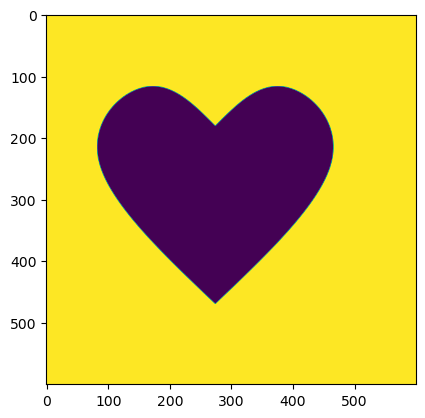

In [79]:
image_path = os.path.join('Pictures','heart.png')
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
blur = cv2.GaussianBlur(gray, (5,5), 0)

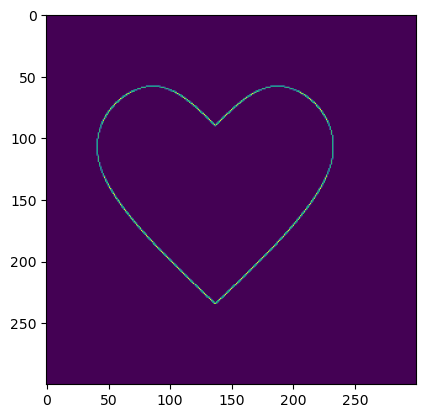

In [80]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('Frame View', resize_image)
plt.imshow(resize_image)

In [154]:
corners= cv2.goodFeaturesToTrack(gray, 200, .00325, 17)
print(len(corners))

17


In [155]:
edges = GetAllEdges(corners, canny)
print(len(edges))

15


In [141]:
SP_index = StartPoint(corners)

1. Find Edge with Start Point inside
2. Move to next edge
3. ALL other edges can only move one direction in simple figures

In [142]:
visited = []
index = SP_index
next_index = index
enter = False
print(index)
print(edges)
while(len(edges) != 0):
    for e in edges:
        if(e[0]==next_index):
            next_index = e[1]
            visited.append(e)
            edges.remove(e)
        elif(e[1]==next_index):
            next_index = e[0]
            visited.append([e[1],e[0]])
            edges.remove(e)
        else:
            enter = True
print(visited)

1
[[0, 14], [0, 15], [2, 8], [2, 10], [2, 11], [3, 5], [3, 9], [3, 10], [3, 11], [3, 16], [6, 14], [7, 15], [8, 12], [9, 13], [9, 16], [11, 16], [13, 16]]


KeyboardInterrupt: 

In [ ]:
path = []
path.append((corners[0][0][0]))
path.append((corners[0][0][1]))
path.append((corners[1][0][0]))
path.append((corners[1][0][1]))
    
print(path)

In [76]:
path = []
for v in visited:
    path.append([corners[v[0]][0][0], corners[v[0]][0][1]])
    
path.append(path[0])    
print(path)

[[168.0, 499.0], [383.0, 499.0], [450.0, 257.0], [276.0, 107.0], [101.0, 257.0], [168.0, 499.0]]


The following is reiterated so that edges is not emptied

In [24]:
edges = GetAllEdges(corners, canny)
print(edges)

[[0, 4], [1, 3], [2, 3], [2, 4]]


In [25]:
SP_index = StartPoint(corners)

In [26]:
print(edges)
print(SP_index)
visited = GetPath(edges, SP_index)
print(visited)

[[0, 4], [1, 3], [2, 3], [2, 4]]
0
[[0, 4], [4, 2], [2, 3], [3, 1]]


In [27]:
path = PathCoordinates(corners, visited)
print(path)

[[168.0, 499.0], [101.0, 257.0], [276.0, 107.0], [450.0, 257.0], [168.0, 499.0]]


In [28]:
corners = GetAllCorners('rhombus.png')
print(corners)

[[[680.  52.]]

 [[151. 544.]]

 [[603. 454.]]

 [[228. 142.]]]


<h1>Simple Geometric Figures Working Code<h1>

In [29]:
Pic_Name = 'rhombus.png'
corners = GetAllCorners(Pic_Name)
canny = GetCanny(Pic_Name)
edges = GetAllEdges(corners, canny)
StartPoint_Index = StartPoint(corners)
visited = GetPath(edges, StartPoint_Index)
path = PathCoordinates(corners, visited)
file = GetFileName(Pic_Name)
PathToFile(file, path)

print(path)

[[151.0, 544.0], [603.0, 454.0], [680.0, 52.0], [228.0, 142.0], [151.0, 544.0]]


<h1>Variance Testing<h1>

In [30]:
print(path)

[[151.0, 544.0], [603.0, 454.0], [680.0, 52.0], [228.0, 142.0], [151.0, 544.0]]


In [31]:
print(canny[int(path[0][1])][int(path[0][0])])
print(canny[int(path[1][1])][int(path[1][0])])
print(canny[int(path[2][1])][int(path[2][0])])
print(canny[int(path[3][1])][int(path[3][0])])

255
255
255
255


<h3>Rhombus Variance<h3>

In [32]:
print(canny[int(path[0][1])][int(path[0][0])-1])
print(canny[int(path[1][1])][int(path[1][0])+1])
print(canny[int(path[2][1])][int(path[2][0])+1])
print(canny[int(path[3][1])][int(path[3][0])-1])

0
255
255
255


In [33]:
print(canny[int(path[0][1])][int(path[0][0])-1])
print(canny[int(path[1][1])][int(path[1][0])+2])
print(canny[int(path[2][1])][int(path[2][0])+2])
print(canny[int(path[3][1])][int(path[3][0])-2])

0
0
0
0


1. Points 0 and 3 are the upper two corners of the rhombus, the row value has to be subtracted from
2. Points 1 and 2 are the lower two corners of the rhombus, the row value has to be added to

In [34]:
print(canny[int(path[0][1])+1][int(path[0][0])])
print(canny[int(path[1][1])+1][int(path[1][0])])
print(canny[int(path[2][1])-1][int(path[2][0])])
print(canny[int(path[3][1])-1][int(path[3][0])])

0
255
0
255


In [35]:
print(canny[int(path[0][1])+1][int(path[0][0])])
print(canny[int(path[1][1])+2][int(path[1][0])])
print(canny[int(path[2][1])-1][int(path[2][0])])
print(canny[int(path[3][1])-2][int(path[3][0])])

0
0
0
0


1. Points 0 and 1 are the right two corners of the rhombus, the col value has to be added to
2. Points 2 and 3 are the left two corners of the rhombus, the col value has to be subtracted from

There are four points to test the variance of

1. We will consider a point that has a 0 value 1 pixel away to have a variance of zero
2. the value will have +1 added to it for each additional pixel from that point
3. the Mean Difference for the Rows is (0+1+1+1)/4 = .75
4. The Mean Difference for the Columns is (0+1+0+1)/4 = .5
5. Variance = sum(mean-all points)^2/sample size
    a. Rows: (.25^2+.25^2+.25^2+.75^2)/4 = .1875
    b. Cols: (.5^2+.5^2+.5^2+.5^2)/4 = .25
    c. overall: sqrt(.1875^2+.25^2) = .3125
6. Standard Deviation = sqrt(.3125) = 0.09765625

<h3>Triangle<h3>

In [156]:
Pic_Name = 'equi_triangle.png'
corners = GetAllCorners(Pic_Name)
canny = GetCanny(Pic_Name)
edges = GetAllEdges(corners, canny)
StartPoint_Index = StartPoint(corners)
visited = GetPath(edges, StartPoint_Index)
path = PathCoordinates(corners, visited)
file = GetFileName(Pic_Name)
PathToFile(file, path)

print(path)

[[393.0, 421.0], [148.0, 372.0], [319.0, 156.0], [393.0, 421.0]]


<h3>Pentagon<h3>

In [157]:
Pic_Name = 'pentagon.png'
corners = GetAllCorners(Pic_Name)
canny = GetCanny(Pic_Name)
edges = GetAllEdges(corners, canny)
StartPoint_Index = StartPoint(corners)
visited = GetPath(edges, StartPoint_Index)
path = PathCoordinates(corners, visited)
file = GetFileName(Pic_Name)
PathToFile(file, path)

print(path)

[[168.0, 499.0], [383.0, 499.0], [450.0, 257.0], [276.0, 107.0], [101.0, 257.0], [168.0, 499.0]]


In [158]:
Pic_Name = 'star3.png'
corners = GetAllCorners(Pic_Name)
canny = GetCanny(Pic_Name)
edges = GetAllEdges(corners, canny)
StartPoint_Index = StartPoint(corners)
visited = GetPath(edges, StartPoint_Index)
path = PathCoordinates(corners, visited)
file = GetFileName(Pic_Name)
PathToFile(file, path)

print(path)

[[108.0, 439.0], [259.0, 318.0], [299.0, 136.0], [338.0, 318.0], [489.0, 439.0], [299.0, 379.0], [108.0, 439.0]]


In [159]:
Pic_Name = 'star4.png'
corners = GetAllCorners(Pic_Name)
canny = GetCanny(Pic_Name)
edges = GetAllEdges(corners, canny)
StartPoint_Index = StartPoint(corners)
visited = GetPath(edges, StartPoint_Index)
path = PathCoordinates(corners, visited)
file = GetFileName(Pic_Name)
PathToFile(file, path)

print(path)

[[214.0, 485.0], [239.0, 326.0], [104.0, 234.0], [266.0, 262.0], [358.0, 129.0], [332.0, 289.0], [467.0, 381.0], [305.0, 353.0], [214.0, 485.0]]


In [160]:
Pic_Name = 'heart.png'
corners = GetAllCurvedCorners(Pic_Name)
canny = GetCanny(Pic_Name)
edges = GetAllEdges(corners, canny)
StartPoint_Index = StartPoint(corners)
visited = GetPath(edges, StartPoint_Index)
path = PathCoordinates(corners, visited)
file = GetFileName(Pic_Name)
PathToFile(file, path)

print(path)

KeyboardInterrupt: 